In [1]:
def adapt_obs(observation_env, entity):
    observation_norm = []
    for j in range(len(observation_env)):
        if entity.obs_norm[j].std != 0:
            observation_norm.append((observation_env[j]-entity.obs_norm[j].mean) / entity.obs_norm[j].std)    
        else:
            observation_norm.append(observation_env[j])

        entity.updated_obs_norm[j](observation_env[j])

    return observation_norm

def agent_env_loop(entity, generation):
    entity.survived = True
    entity.fitness = 0
    env.seed(10)
    observation_env = env.reset()  # s_0

    for i in range(MAX_SEQUENCE_LEN):

        if WELFORD:
            observation_norm = adapt_obs(observation_env, entity)   
        else:
            observation_norm = observation_env 
        
        entity.action_sequ.append(entity.controller.feed_forward(observation_norm)) # a_t, s_t 
        observation_env, reward, done, _ = env.step(entity.action_sequ[-1])                     # s_{t+1}, r_{t+1}            

        entity.fitness += reward
        if done:
            break

Dim. action space: (4,)
Dim. observation space: (24,)
--- Generation 0 ---
INFO:root:Time for diversity calculation: 14.736199617385864


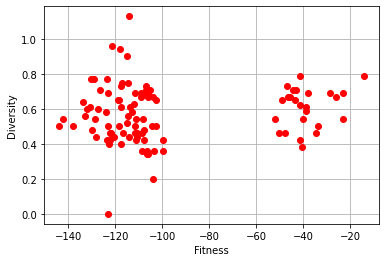

INFO:root:60 survived walker,max fitness: -14.270139089104312
Time: 21.75 sec
--- Generation 1 ---
INFO:root:50 survived walker,max fitness: -14.270139089104312
Time: 2.70 sec
--- Generation 2 ---
INFO:root:47 survived walker,max fitness: -14.270139089104312
Time: 3.69 sec
--- Generation 3 ---


KeyboardInterrupt: 

In [2]:
import gym
import time
from src.entity import Entity
from src.evolutionCtrl import Population_Manager
from src.trainEval import TrainEval
import logging
from src.optional.welford import Welford
#############
import copy
#############

logging.basicConfig(level=logging.INFO)
gym.logger.set_level(40)

# 1) Environment
env = gym.make("BipedalWalker-v3")
print(f"Dim. action space: {env.action_space.shape}")
print(f"Dim. observation space: {env.observation_space.shape}")

# 2) Training Params
POP_SIZE = 100
MAX_SEQUENCE_LEN = 400
N_GENERATIONS = 2500
MUTATION_RATE = .1
PROB_NODE_COPY = .1
WEIGHT_INIT_INTERVAL = [-1.0, 1.0]
WELFORD = False
print(f"Welford-normalizer set to : {WELFORD}")
N_LAYER_NODES = [env.observation_space.shape[0],
                 50,
                 env.action_space.shape[0]]
# 48, 48, 32,  |  70-80 fitness o. Welford  
#  32,32, 
# 3) Init population
init_population = [Entity(N_LAYER_NODES, WEIGHT_INIT_INTERVAL)
                   for i in range(POP_SIZE)]

pop_manager = Population_Manager(init_population, MUTATION_RATE,
                                 PROB_NODE_COPY)

train_evaluator = TrainEval()

# 4) Start training
if __name__ == '__main__':
    for generation in range(N_GENERATIONS):
        t_start = time.time()

        print(f"--- Generation {generation} ---")
        for entity in pop_manager.population:
            if not entity.survived:
                agent_env_loop(entity, generation)

        if generation % 50 == 0:
            train_evaluator.eval_training(pop_manager.population)

        pop_manager.breed_new_population()

        print(f"Time: {(time.time() - t_start):.2f} sec")

# TODO: type checking, properties

In [5]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
agent = pop_manager.population[1]
agent.obs_norm#[0].std 

[<Welford: 0.368967017435952 +- 0.4555970184196942>,
 <Welford: -0.0003078357698408735 +- 0.0981608844642273>,
 <Welford: 0.2340959313236481 +- 0.15108155383854047>,
 <Welford: -0.006703650394991778 +- 0.1280230874680535>,
 <Welford: -0.5388677399748816 +- 0.3875858092767193>,
 <Welford: -0.010121885420276797 +- 0.6406676670637435>,
 <Welford: -0.23917424474650967 +- 0.48059700515113335>,
 <Welford: -0.06424405871122274 +- 0.6603872356157462>,
 <Welford: 0.3147486714870639 +- 0.46442244622067475>,
 <Welford: 0.9754104420055328 +- 0.3174431473473531>,
 <Welford: 0.0427717388096869 +- 0.5434744486678217>,
 <Welford: 0.3063963810809217 +- 0.6183670834504585>,
 <Welford: 0.012677165376450182 +- 0.7941877757263337>,
 <Welford: 0.23018846008653446 +- 0.420959474008511>,
 <Welford: 0.3359057095748734 +- 0.06337353439537592>,
 <Welford: 0.3396148596401485 +- 0.0640685685844524>,
 <Welford: 0.3513714496489709 +- 0.06626696396670631>,
 <Welford: 0.3726181014234233 +- 0.07024384760886682>,
 <Welf

In [20]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
best_agent = pop_manager.population[-5]
best_agent.fitness

-1000

In [21]:
env.seed(10) 
observation = env.reset()
reward_test = .0
obs_list = []
action_list = []
for _ in range(MAX_SEQUENCE_LEN):
    env.render()
    action = best_agent.controller.feed_forward(observation)            # a_t, s_t            
    observation, reward, done, _ = env.step(action)                     # s_{t+1}, r_{t+1}, a_t 
    obs_list.append(observation)
    action_list.append(action)
    reward_test += reward
env.close()
reward_test

-25.005553468487665

In [17]:
dim_1 = [x[0] for x in obs_list]
adim = [x[3] for x in action_list]
#adim

In [35]:
class testclass(object):
    def __init__(self):
        self.weights = [[1,2,3], [4,5,6]]

x = testclass()

In [36]:
y = x.weights[0]
y

[1, 2, 3]

In [37]:
y[0] = 7

In [38]:
x.weights[0]

[7, 2, 3]

In [39]:
y

[7, 2, 3]

In [34]:
a = [1,2,3]
b = a
b[0] = 4
a

[4, 2, 3]

In [5]:
import numpy as np
weights = np.random.uniform(-1.0, 1.0, (4, 3))
weights_2 = np.random.uniform(-1.0, 1.0, (4, 3))

In [21]:
from difflib import SequenceMatcher as SequMatch

rat = 0.0
for i in range(len(weights)):
    sm = SequMatch(None, weights[i].round(1), weights_2[i].round(1))
    rat += sm.ratio()
weights
weights_2
#rat

array([[-0.13601143,  0.97048332, -0.8253675 ],
       [ 0.72817677,  0.75721678,  0.75244338],
       [-0.26970826, -0.59656433,  0.79409955],
       [-0.86833561, -0.64606015, -0.6582288 ]])

In [10]:
np.random.uniform(low = -1.0, high = 1.0, size = 3)

array([0.96191887, 0.5971491 , 0.52781256])

In [1]:
id(2)

140703733913392

In [3]:
id(2.0)

1553873537200